In [22]:
import mogptk

m1_real=mogptk.LoadModel("first_real2")
m2_real=mogptk.LoadModel('second_real2')
m3_real=mogptk.LoadModel('third_real2')
m4_real=mogptk.LoadModel('fourth_real2')
m1_im=mogptk.LoadModel('first_im2')
m2_im=mogptk.LoadModel('second_im2')
m3_im=mogptk.LoadModel('third_im2')
m4_im=mogptk.LoadModel('fourth_im2')

In [23]:
for i in m1_real.parameters():
    print(i)

IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[0.7945221775389467, 0.29326426599342414, 0.42306937978331804, 0.7705034556031094, 0.03076418723745181, 0.8387191883138667, 0.41685150130145787, 0.7911176898216832, 0.5975290254428295, 0.4605100979420218, 0.6699855773194108, 0.5505321123481599, 0.7159927504586777, 0.32037196604634294, 0.4864707878934175, 0.4775017630507575, 0.600626162123176, 0.5225870792573176, 0.9822852484979359, 0.6876957147399124]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08], [1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08], [1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08], [1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08], [1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08], [1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08

In [24]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq

In [25]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5

In [26]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))

[355.  356.2 357.4 358.6 359.8 361. ]


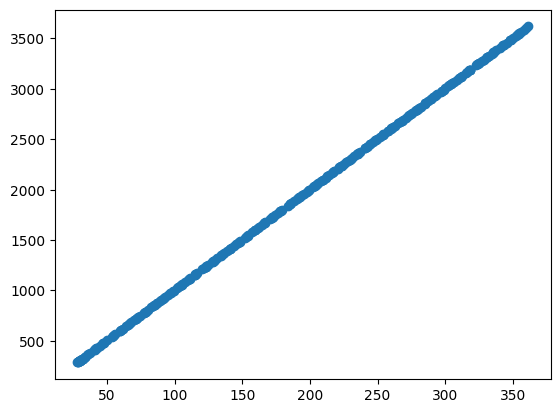

In [27]:
print(x_train[49])
f1 = []
f2 = []
for i in x_train:
    values1 = []
    values2 = []
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)

flat_x = [x for xs in f1 for x in xs]
flat_y = [x for xs in f2 for x in xs]
plt.scatter(flat_x, flat_y)
plt.savefig('low_f_to_high_f.png')

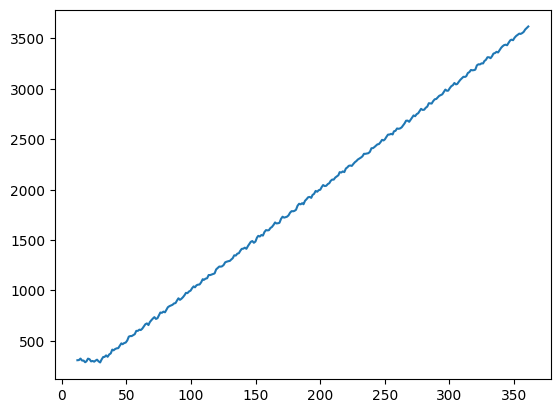

In [28]:
x_points=np.asarray(x_train)
x_points=x_points.flatten()
plt.plot(x_points,flat_y)
plt.savefig("simple_experiments_h_f.png")

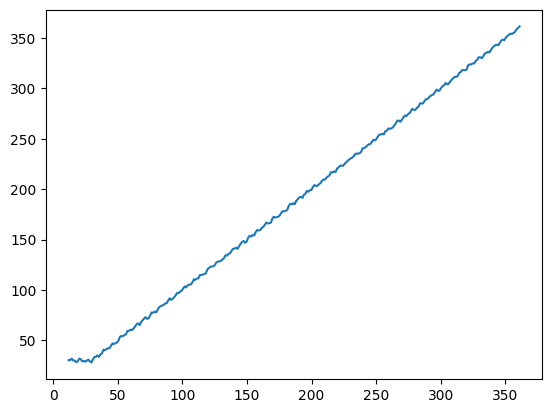

In [29]:
plt.plot(x_points, flat_x)
plt.savefig('simple_experiments_low_f.png')

In [30]:
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]

vis_real_1=[]
vis_real_2=[]
vis_imag_1=[]
vis_imag_2=[]

for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    
    
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
x_train_imag=torch.tensor(np.asarray(f1_imag)[:,1:3])

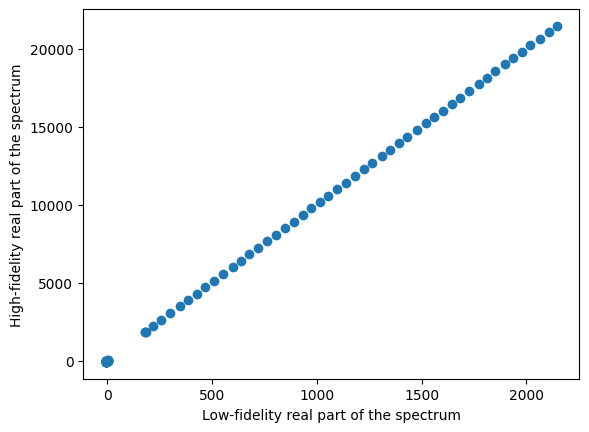

In [31]:
flat_sig1 = [x for xs in f1_real for x in xs]
flat_sig2 = [x for xs in f2_real for x in xs]
plt.scatter(flat_sig1, flat_sig2)
plt.xlabel("Low-fidelity real part of the spectrum")
plt.ylabel("High-fidelity real part of the spectrum")
plt.savefig("simple_relation_real.jpeg")


In [32]:
len(flat_sig1)

200

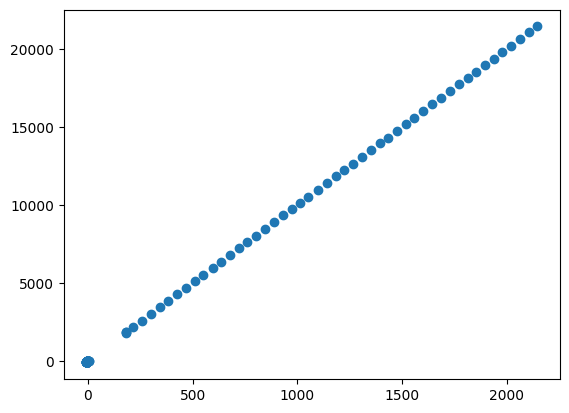

In [33]:
plt.scatter(f1_real,f2_real)

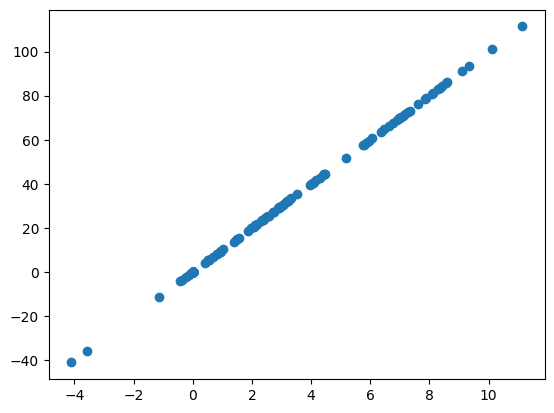

In [34]:
plt.scatter(f1_imag, f2_imag)

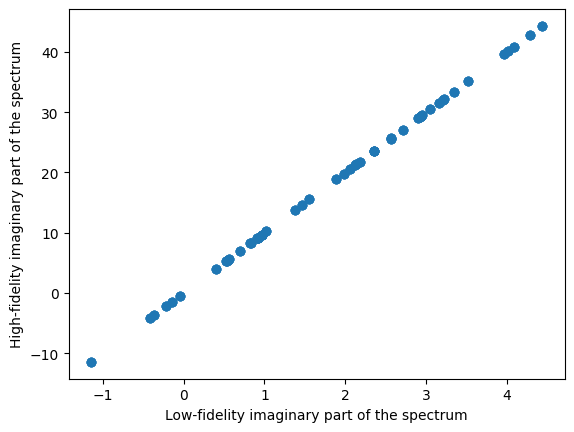

In [35]:
flat_sig1i = [xs[2] for xs in f1_imag for x in xs]
flat_sig2i = [xs[2] for xs in f2_imag for x in xs]
plt.scatter(flat_sig1i, flat_sig2i)
plt.xlabel("Low-fidelity imaginary part of the spectrum")
plt.ylabel("High-fidelity imaginary part of the spectrum")
plt.savefig("simple_relation_imag.jpeg")

In [36]:
print(f1_real[:10])
print(f2_real[:10])

[[181.09133769100293, -1.2328499629323453, -0.051957992726546, 3.485725118506309], [180.08289178600742, -0.05418171359294388, -2.4876273180755915, 0.13891728122555946], [182.82985952698942, 3.8247841596915313, -4.4110006960588555, -2.1733060045665553], [216.35748921259875, 0.14148930327082154, -3.7664504897129714, -7.653661078019766], [257.60397688716114, -1.2730071161591796, -5.176014776729302, -3.8254349212781733], [299.41507921305697, -3.6678544068195023, -5.472462000289907, -3.7683513055748676], [345.1587685710813, -5.062516937699305, -2.0214863414186035, -5.398327580655604], [383.7070952211075, -7.7080329960502, -2.462799440010692, -1.873271737088146], [426.0063364271987, -5.544123582829901, -1.3651276420700746, -4.107649912481293], [466.56193078480135, -2.374617496263852, -3.5474606093096384, -6.914597013297993]]
[[1840.9133769100295, -12.328499629323503, -0.5195799272655242, 34.85725118506309], [1830.8289178600744, -0.5418171359294508, -24.87627318075593, 1.3891728122556515], [1

In [37]:
f1_imag[:10]

[[0.0, -3.565263884152948, -0.14076201444232894, 0.0],
 [0.0, -4.0987245533027, -1.142376984851227, 0.0],
 [0.0, 4.0532341971028, 0.5619487839801312, 0.0],
 [0.0, 7.8772199271288645, 2.0620868842503484, 0.0],
 [0.0, 7.048103366363215, 2.7090058608657746, 0.0],
 [0.0, 11.13709836049851, 0.9153091504333517, 0.0],
 [0.0, 7.610115839516018, 1.8846063136538755, 0.0],
 [0.0, 5.741415246813394, 0.5326884817959341, 0.0],
 [0.0, 1.492633881216497, 2.132290667315738, 0.0],
 [0.0, 2.9962963648340035, 2.118307160427849, 0.0]]

In [38]:
_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_real)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

4 input dims


ValueError: X must have 12 input dimensions

In [39]:
real

array([ 8462.8452836 ,  9337.80073358, 30750.43840012, 41435.89398912,
       34876.51028331, 36729.44910486, 44923.21272854, 28314.56023978,
       41258.93136073, 33182.40473432, 27974.90979068, 48510.96351854,
       36593.82427   , 41482.36784772, 44894.96498101, 33113.36422371,
       39551.967358  , 45831.72906819, 22726.09342898, 39997.78624608,
       36179.71713415, 42645.14071695, 37923.68424328, 44061.54920329,
       30469.92519309, 25856.97178614, 33430.74664435, 35388.02379866,
       37144.97275225, 38102.02741199, 33788.41576922, 43878.48618252,
       49250.20337089, 31742.37689834, 34463.42714475, 34799.86343739,
       34077.83525275, 42317.70758547, 29725.49447511, 39132.9327636 ,
       35958.9666362 , 36343.8134    , 52817.62914633, 45307.18312866,
       37559.17708705, 33435.54513403, 38622.37521802, 41006.89385452,
       39506.36862756, 48712.08425824, 32207.93064364, 45339.38770307,
       35923.24410581, 48065.6571411 , 29809.36191309, 33327.15159574,
      

In [40]:
x_train_real

tensor([[ 1.8109e+02, -1.2328e+00, -5.1958e-02,  3.4857e+00],
        [ 1.8008e+02, -5.4182e-02, -2.4876e+00,  1.3892e-01],
        [ 1.8283e+02,  3.8248e+00, -4.4110e+00, -2.1733e+00],
        [ 2.1636e+02,  1.4149e-01, -3.7665e+00, -7.6537e+00],
        [ 2.5760e+02, -1.2730e+00, -5.1760e+00, -3.8254e+00],
        [ 2.9942e+02, -3.6679e+00, -5.4725e+00, -3.7684e+00],
        [ 3.4516e+02, -5.0625e+00, -2.0215e+00, -5.3983e+00],
        [ 3.8371e+02, -7.7080e+00, -2.4628e+00, -1.8733e+00],
        [ 4.2601e+02, -5.5441e+00, -1.3651e+00, -4.1076e+00],
        [ 4.6656e+02, -2.3746e+00, -3.5475e+00, -6.9146e+00],
        [ 5.1039e+02, -2.5714e+00, -2.9638e+00, -2.1539e+00],
        [ 5.5068e+02, -2.4952e-01, -4.2196e+00, -5.5892e+00],
        [ 5.9730e+02, -2.1598e+00, -3.9476e+00, -2.3576e+00],
        [ 6.3639e+02, -1.6322e+00, -6.0298e+00, -5.2515e+00],
        [ 6.7799e+02, -4.6157e+00, -1.5588e+00, -4.9702e+00],
        [ 7.2098e+02, -8.0857e+00, -3.9003e+00, -1.9742e+00],
        

In [41]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

ValueError: x and y must have same first dimension, but have shapes (300,) and (600,)

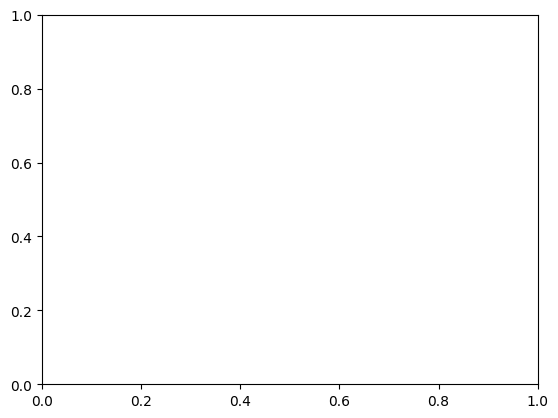

In [42]:
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.plot(flat_x, values2)
plt.savefig("simple_sm_kernel.jpeg")

In [43]:
len(flat_sig1)

200

In [44]:
len(values2)

600

ValueError: x and y must be the same size

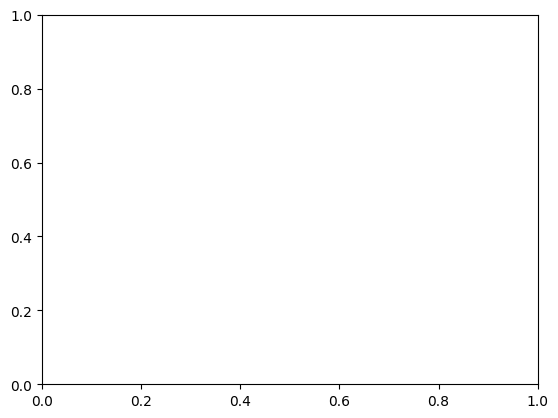

In [45]:
plt.scatter(flat_x, values2)

In [46]:
model1_k_real=mogptk.LoadModel("first_real_kernel")
model2_k_real=mogptk.LoadModel("second_real_kernel")
model3_k_real=mogptk.LoadModel("third_real_kernel")
model4_k_real=mogptk.LoadModel("fourth_real_kernel")

model1_k_imag=mogptk.LoadModel("first_im_kernel")
model2_k_imag=mogptk.LoadModel("second_im_kernel")
model3_k_imag=mogptk.LoadModel("third_im_kernel")
model4_k_imag=mogptk.LoadModel("fourth_im_kernel")

_,real_k,_,_=model1_k_real.predict(x_train_real)
_,real2_k,_,_=model2_k_real.predict(x_train_real)
_,real3_k,_,_=model3_k_real.predict(x_train_real)
_,real4_k,_,_=model4_k_real.predict(x_train_real)

_,im1_k,_,_=model1_k_imag.predict(x_train_imag)
_,im2_k,_,_=model2_k_imag.predict(x_train_imag)
_,im3_k,_,_=model3_k_imag.predict(x_train_imag)
_,im4_k,_,_=model4_k_imag.predict(x_train_imag)

In [47]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)

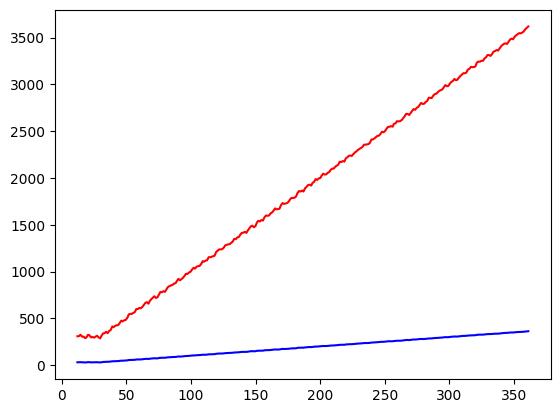

In [48]:
vals=values.flatten()
x_points=x_train.flatten()
values2=np.asarray(f2).flatten()
plt.plot(x_points, vals, c="b")
plt.plot(x_points, flat_y, c="r")
plt.savefig("simple_custom_kernels.jpeg")

1 input dimensions
None active dimensions
None input dimensions
None active dimensions
1 kernel input dims
IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[0.0942935062268588, 0.42599575538211576, 0.9842365724335385, 0.7879404744075239, 0.7050243743683037, 0.6575804185158167, 0.5646483069981479, 1.031393604103878, 0.7160038986652377, 0.12488590918003441, 0.2333613913854458, 0.3918090260264801, 0.6261595319410297, 1.0378312197679769, 0.9022419366842516]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08]]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.variance=[[0.699400044957953], [0.3807594613727975], [0.7735486588895928], [0.2278590284377527], [0.6477582508263503], [0.709371337679311], [0.22183296808616346], [0.1514683912296553], [0.7762356356148371], [0.46805703959328343], [0.17027090005899367], [0.5035733005589828], [0.

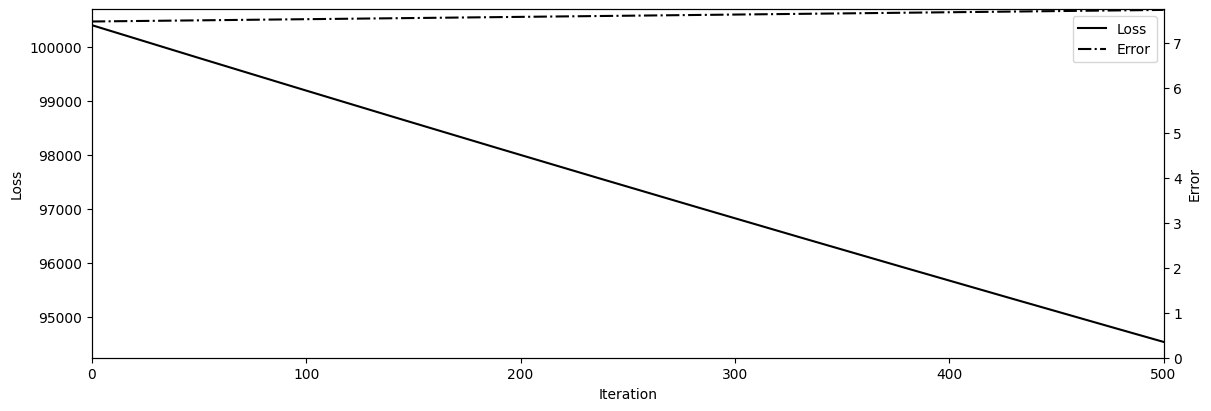

In [62]:

test_d=np.linspace(1,200,200)
test_y=np.linspace(1,200,200)
data=mogptk.DataSet(test_d, test_y)
model=mogptk.SM(data, Q=15)
model.train(method="Adam", plot=True, iters=500, error="MAE")
for i in model.parameters():
    print(i)

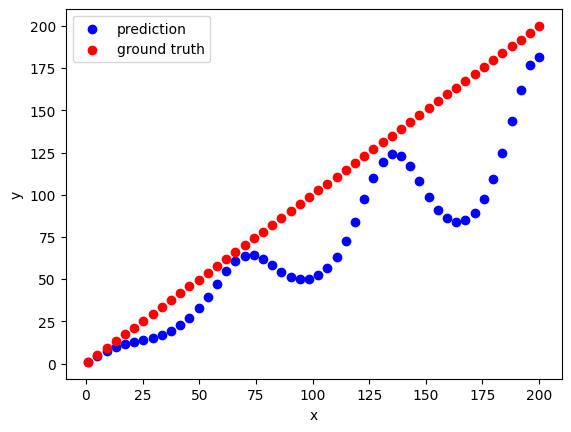

In [63]:
tr=np.linspace(1,200,50)
output=model.predict(tr)
plt.scatter(tr, output[1],c="b", label="prediction")
plt.scatter(tr, tr, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_linear_200.jpeg")

In [48]:
for i in model.parameters():
    print(i)

IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[0.4712573831778293, 0.4487279118877855, 0.19089431487010095, 0.09622690948241093, 0.40017039293877826, 0.9588656526748088, 0.12548792301114559, 0.399219340216857, 0.4317822639262425, 0.2652198143007689, 0.2822473517523092, 0.13199152073011278, 0.7109973718300882, 0.6012608304812084, 0.854946404776947]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08]]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.variance=[[0.6190424374963283], [0.49726600737557747], [0.1550513231228432], [0.8743275263130851], [0.6156955550481806], [0.08299552637961051], [0.07168434561751358], [0.44194408191155776], [0.442605527856704], [0.7303659273555739], [0.905890728201311], [0.2868854585504852], [0.41687300485825957], [0.08466129194633441], [0.4616201929842559]]
GaussianLikelihood.scale=[1.04807545380

In [94]:
x=np.asarray([[7]])
X = model.dataset._format_X(x)
x = model._to_kernel_format(X)
model.gpr.predict_f(x)
# first mean
#second variance

(tensor([[6.3774]], dtype=torch.float64),
 tensor([[0.9442]], dtype=torch.float64))

In [76]:
m1_real=mogptk.LoadModel("first_real30")
m2_real=mogptk.LoadModel('second_real30')
m3_real=mogptk.LoadModel('third_real30')
m4_real=mogptk.LoadModel('fourth_real30')
m1_im=mogptk.LoadModel('first_im30')
m2_im=mogptk.LoadModel('second_im30')
m3_im=mogptk.LoadModel('third_im30')
m4_im=mogptk.LoadModel('fourth_im30')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

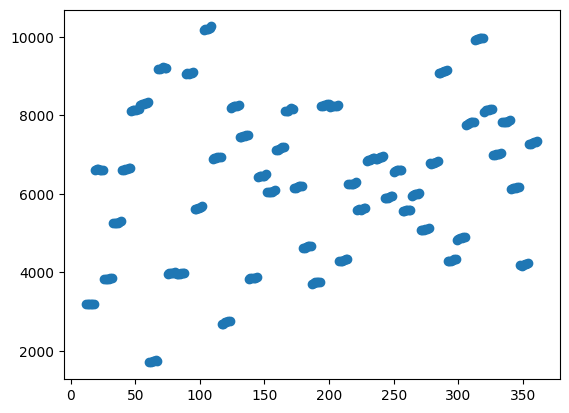

In [79]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    


values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.scatter(x_points, values2)

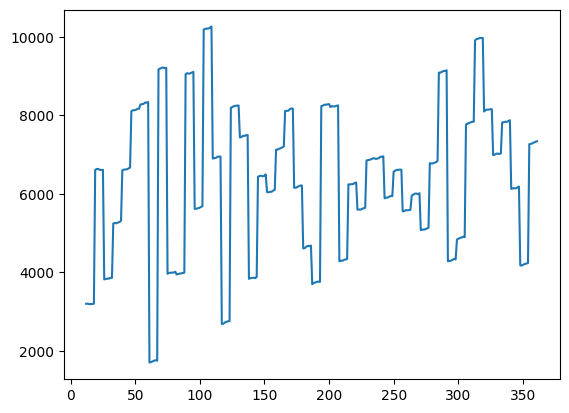

In [83]:
plt.plot(x_points, values2)

In [59]:
#def func1(t):
 #   return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

#def func2(t):
 #   return (torch.relu(func1(t))+ torch.sigmoid(func1(t)))
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))


#(x_train[398], "training", x_train[399])

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(x_train[i])):
        real_train.append(x_train[i][p])

    # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)

    real_train2 = []
    imag_train2 = []
    for k in value2:
        real_train2.append(k.real)
        imag_train2.append(k.imag)

    f2_real.append(real_train2)
    f2_imag.append(imag_train2)





x_train_real=torch.tensor(np.asarray(f1_real))

In [60]:
model1_k_real=mogptk.LoadModel("first_real_kernel2")
model2_k_real=mogptk.LoadModel("second_real_kernel2")
model3_k_real=mogptk.LoadModel("third_real_kernel2")
model4_k_real=mogptk.LoadModel("fourth_real_kernel2")

model1_k_imag=mogptk.LoadModel("first_im_kernel2")
model2_k_imag=mogptk.LoadModel("second_im_kernel2")
model3_k_imag=mogptk.LoadModel("third_im_kernel2")
model4_k_imag=mogptk.LoadModel("fourth_im_kernel2")

_,real_k,_,_=model1_k_real.predict(x_train_real)
_,real2_k,_,_=model2_k_real.predict(x_train_real)
_,real3_k,_,_=model3_k_real.predict(x_train_real)
_,real4_k,_,_=model4_k_real.predict(x_train_real)

_,im1_k,_,_=model1_k_imag.predict(x_train_real)
_,im2_k,_,_=model2_k_imag.predict(x_train_real)
_,im3_k,_,_=model3_k_imag.predict(x_train_real)
_,im4_k,_,_=model4_k_imag.predict(x_train_real)

In [61]:
x_train_real.shape

torch.Size([50, 14])

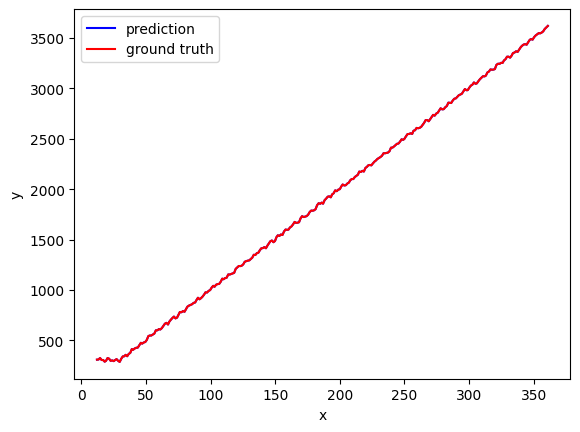

In [63]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
vals=values.flatten()
x_points=x_train.flatten()
values2=np.asarray(f2).flatten()
plt.plot(x_points, vals, c="b", label="prediction")
plt.plot(x_points, values2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("simple_custom_kernels.jpeg")

In [71]:
m1_real=mogptk.LoadModel("first_real2")
m2_real=mogptk.LoadModel('second_real2')
m3_real=mogptk.LoadModel('third_real2')
m4_real=mogptk.LoadModel('fourth_real2')
m1_im=mogptk.LoadModel('first_im2')
m2_im=mogptk.LoadModel('second_im2')
m3_im=mogptk.LoadModel('third_im2')
m4_im=mogptk.LoadModel('fourth_im2')

def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))


#(x_train[398], "training", x_train[399])

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(x_train[i])):
        real_train.append(x_train[i][p])

    # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)

    real_train2 = []
    imag_train2 = []
    for k in value2:
        real_train2.append(k.real)
        imag_train2.append(k.imag)

    f2_real.append(real_train2)
    f2_imag.append(imag_train2)



f1_real=np.asarray(f1_real)
f1_real=np.delete(f1_real, 1,1)
f1_real=np.delete(f1_real,6,1)

x_train_real=torch.tensor(np.asarray(f1_real))

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_real)
_,im2,_,_=m2_im.predict(x_train_real)
_,im3,_,_=m3_im.predict(x_train_real)
_,im4,_,_=m4_im.predict(x_train_real)

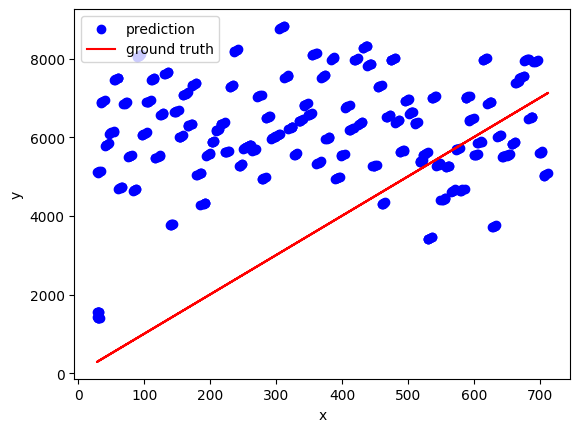

In [20]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.scatter(flat_x, values2, label="prediction", c="b")
plt.plot(flat_x, np.asarray(f2).flatten(), label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("simple_sm_kernel.jpeg")

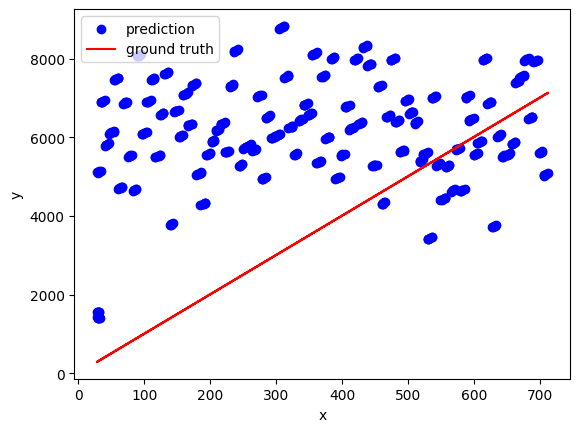

In [21]:
m1_real=mogptk.LoadModel("first_real2_700")
m2_real=mogptk.LoadModel('second_real2_700')
m3_real=mogptk.LoadModel('third_real2_700')
m4_real=mogptk.LoadModel('fourth_real2_700')
m1_im=mogptk.LoadModel('first_im2_700')
m2_im=mogptk.LoadModel('second_im2_700')
m3_im=mogptk.LoadModel('third_im2_700')
m4_im=mogptk.LoadModel('fourth_im2_700')

def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5
num_training_samples=100
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))


#(x_train[398], "training", x_train[399])

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
flat_x = [x for xs in f1 for x in xs]
flat_y = [x for xs in f2 for x in xs]
for i in range(num_training_samples):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(x_train[i])):
        real_train.append(x_train[i][p])

    # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)

    real_train2 = []
    imag_train2 = []
    for k in value2:
        real_train2.append(k.real)
        imag_train2.append(k.imag)

    f2_real.append(real_train2)
    f2_imag.append(imag_train2)



f1_real=np.asarray(f1_real)
f1_real=np.delete(f1_real, 1,1)
f1_real=np.delete(f1_real,6,1)

x_train_real=torch.tensor(np.asarray(f1_real))

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_real)
_,im2,_,_=m2_im.predict(x_train_real)
_,im3,_,_=m3_im.predict(x_train_real)
_,im4,_,_=m4_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.scatter(flat_x, values2, label="prediction", c="b")
plt.plot(flat_x, np.asarray(f2).flatten(), label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("simple_sm_kernel600.jpeg")